In [29]:
#Import The Dependencies
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [30]:
#Loading the data from csv file to a Pandas DataFrame
customer_Data = pd.read_csv('BankChurners.csv')

In [31]:
#First 5 rows in the dataframe
customer_Data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [32]:
#Finding the number of rows and columns
customer_Data.shape

(10127, 21)

In [23]:
#Getting some information about the dataset
customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [26]:
# Selecting relevant columns
#Credit_Limit - Credit Limit on the Credit Card 
#Total_Revolving_Bal - Total Revolving Balance on the Credit Card
#Avg_Open_To_Buy - Open to Buy Credit Line (Average of last 12 months)
#Avg_Open_To_Buy','Avg_Utilization_Ratio - Average Card Utilization Ratio
features = customer_Data[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 
                 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']]

In [27]:
# Handling missing values (if any)
features.fillna(features.mean(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19992\2959267071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)


In [37]:
# Standardizing the features
scaler = StandardScaler()
features_measure = scaler.fit_transform(features)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

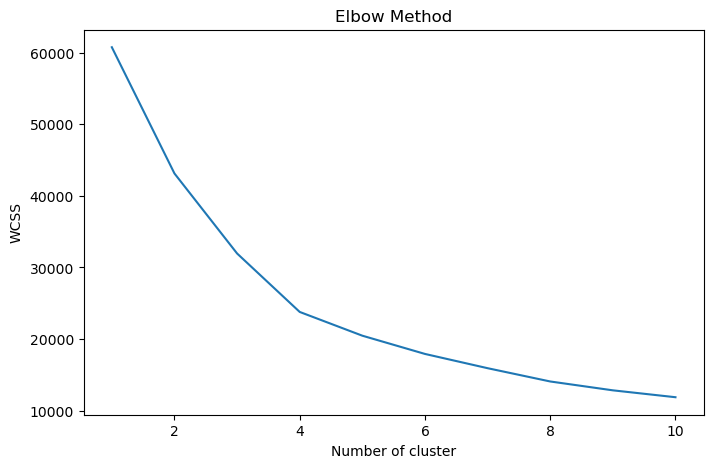

In [38]:
#Optimal Numbers of the clusters
#Use Elbow method to finding the optimal numbers
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_measure)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)  # You can adjust the number of clusters
clusters = kmeans.fit_predict(features_measure)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


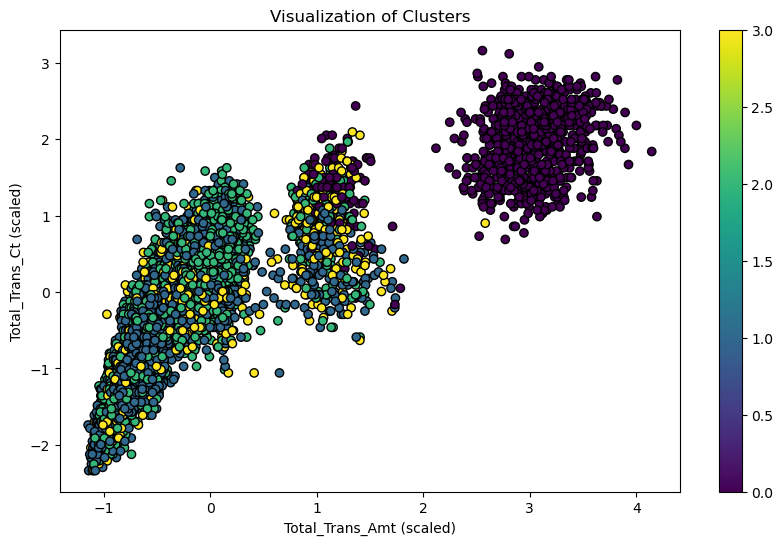

In [40]:
# Plotting the clusters to visualize
plt.figure(figsize=(10, 6))
plt.scatter(features_measure[:, 3], features_scaled[:, 4], c=clusters, cmap='viridis', marker='o', edgecolor='black')
plt.xlabel('Total_Trans_Amt (scaled)')
plt.ylabel('Total_Trans_Ct (scaled)')
plt.title('Visualization of Clusters')
plt.colorbar()
plt.show()

In [41]:
# Calculating the silhouette score
silhouette_avg = silhouette_score(features_measure, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.35


In [42]:
# Identifying anomalies: points far from cluster centroids
distances = kmeans.transform(features_measure)
max_distance = np.percentile(distances, 95)  # Points beyond the 95th percentile distance to their centroid
anomalies_index = distances.max(axis=1) > max_distance
print(f"Number of anomalies detected: {sum(anomalies_index)}")

Number of anomalies detected: 1679


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19992\1349636274.py:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(features_measure[anomalies_index, 3], features_measure[anomalies_index, 4], c='red', marker='x', edgecolor='black', s=100)  # Anomalies


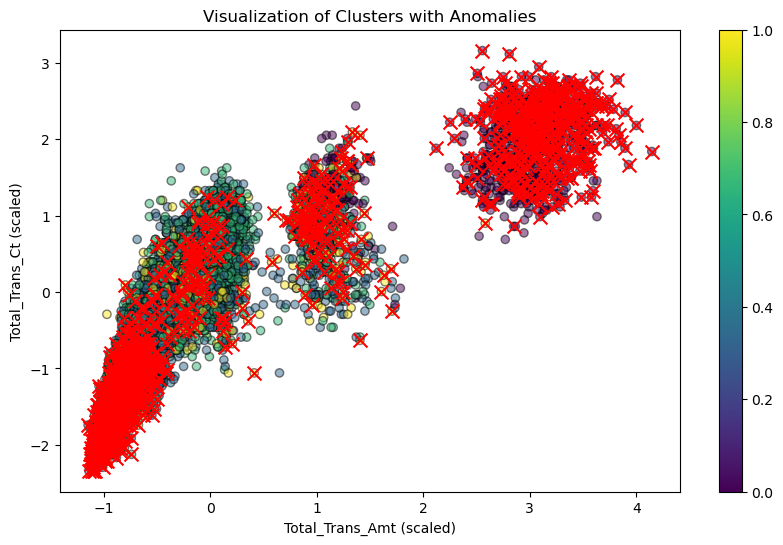

In [49]:
# Plotting anomalies
plt.figure(figsize=(10, 6))
plt.scatter(features_measure[:, 3], features_measure[:, 4], c=clusters, cmap='viridis', marker='o', edgecolor='black', alpha=0.5)  # Normal points
plt.scatter(features_measure[anomalies_index, 3], features_measure[anomalies_index, 4], c='red', marker='x', edgecolor='black', s=100)  # Anomalies

# Labeling the plot
plt.xlabel('Total_Trans_Amt (scaled)')
plt.ylabel('Total_Trans_Ct (scaled)')
plt.title('Visualization of Clusters with Anomalies')
plt.colorbar()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19992\3116794422.py:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(features_measure[anomalies_index, 3], features_measure[anomalies_index, 4], features_measure[anomalies_index, 0], c='red', marker='x', edgecolor='black', s=100)


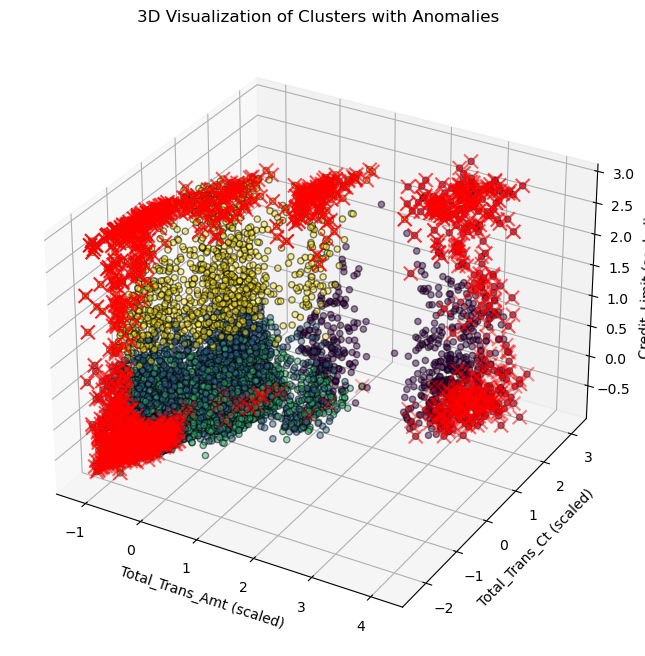

In [51]:
# Plotting in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Normal points
ax.scatter(features_measure[:, 3], features_measure[:, 4], features_measure[:, 0], c=clusters, cmap='viridis', marker='o', edgecolor='black', alpha=0.5)

# Anomalies
ax.scatter(features_measure[anomalies_index, 3], features_measure[anomalies_index, 4], features_measure[anomalies_index, 0], c='red', marker='x', edgecolor='black', s=100)

ax.set_xlabel('Total_Trans_Amt (scaled)')
ax.set_ylabel('Total_Trans_Ct (scaled)')
ax.set_zlabel('Credit_Limit (scaled)')
ax.set_title('3D Visualization of Clusters with Anomalies')

plt.show()